# Requirements

In [ ]:
!pip install -U accelerate
!pip install -U transformers[torch]
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer,AdamW, DataCollatorWithPadding
import numpy as np


In [ ]:
# Add as many imports as you need.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data

# Laboratory Exercise - Run Mode (8 points)

## Introduction
This laboratory assignment's primary objective is to fine-tune a pre-trained LLM for binary classification on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points represent a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is exceptional based on its review.

## The Wine Reviews Dataset

## Downloading the Wine Reviews Dataset



In [ ]:
!gdown 1fz9449M9Owofy6CYrKzkGwXKesI32B8u

## Exploring the Wine Reviews Dataset

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/wine-reviews.csv')

In [ ]:
df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'points'}>]], dtype=object)

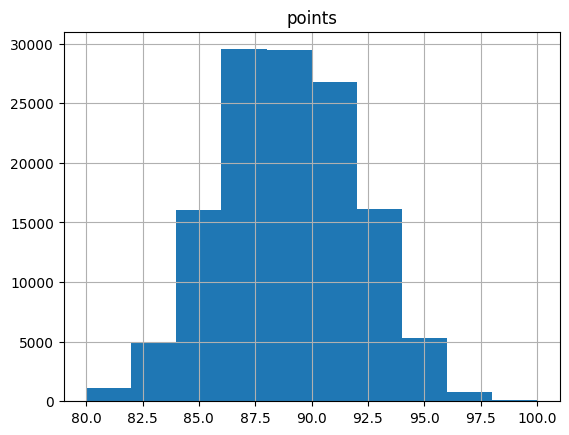

In [ ]:
# Write your code here. Add as many boxes as you need.
df.hist()

## Feauture Extraction
Extract the feature **exceptional** for each wine review. If some wine has at least 90 points it is considered **exceptional**.

In [ ]:
# Write your code here. Add as many boxes as you need.
df['exceptional'] = df['points'].apply(lambda elem: 1 if elem >= 90 else 0)

In [ ]:
df.head()

,description,points,exceptional
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.


In [ ]:
df.drop(columns=['points'], axis=1, inplace=True)

In [ ]:
df.columns = ['description', 'label']

In [ ]:
# Write your code here. Add as many boxes as you need.
df_train, df_test = train_test_split(df, test_size=0.2)

Concat the training set's features and label into a single data frame `train_df`.

In [ ]:
df_train

,description,label
46180,"With fruit from the Hames Valley AVA, this Mor...",0
58491,"From a site at 2,400 feet elevation, this wine...",1
103649,"A dense wine, rich and smooth for a Nuits-St-G...",1
21408,Heavily toasted and loaded with black cherry a...,1
71654,"No longer a second wine of Ducru-Beaucaillou, ...",1
...,...,...
12646,"Cabernet Sauvignon makes up half of this wine,...",1
57235,Dried herb and wood spice aromas are followed ...,1
13613,"This is a light, steely white with more honeys...",0
40828,"From the Loire Valley's Bourgeois family, this...",1


Save the data frame `train_df`.

In [ ]:
# Write your code here. Add as many boxes as you need.
df_train.to_csv('/content/df_train.csv', index=False)

Concat the testing set's features and label into a single data frame `test_df`.

Save the data frame `test_df`.

In [ ]:
# Write your code here. Add as many boxes as you need.
df_test.to_csv('/content/df_test.csv', index=False)

Load the `train_df` and `test_df` into a Hugging Face dataset.

https://huggingface.co/docs/datasets/index

In [ ]:
# Write your code here. Add as many boxes as you need.
dataset = load_dataset("csv", data_files={"train": "df_train.csv", "test":"df_test.csv"})

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'label'],
        num_rows: 103976
    })
    test: Dataset({
        features: ['description', 'label'],
        num_rows: 25995
    })
})

## Tokenization
Tokenize the reviews using `AutoTokenizer`.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer

In [ ]:
# Write your code here. Add as many boxes as you need.
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
encoded_dataset = dataset.map(lambda t: tokenizer(t['description'],  truncation=True), batched=True,load_from_cache_file=False)

Map:   0%|          | 0/103976 [00:00<?, ? examples/s]

Map:   0%|          | 0/25995 [00:00<?, ? examples/s]

In [ ]:
encoded_dataset.column_names

{'train': ['description',
  'label',
  'input_ids',
  'token_type_ids',
  'attention_mask'],
 'test': ['description',
  'label',
  'input_ids',
  'token_type_ids',
  'attention_mask']}

## Fine-tuning an LLM for Binary Classification
Fine-tune a pre-trained LLM model for binary classification on the dataset consisting of wine reviews.

Define the model using `AutoModelForSequenceClassification`.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForSequenceClassification

In [ ]:
# Write your code here. Add as many boxes as you need.
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define the traning parameters using `TrainingArguments`.

https://huggingface.co/docs/transformers/v4.36.1/en/main_classes/trainer#transformers.TrainingArguments

In [ ]:
arg = TrainingArguments(
    "sentiment",
    num_train_epochs=5,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=8,
    seed=42
)

Define the training using `Trainer`.

https://huggingface.co/docs/transformers/v4.36.1/en/main_classes/trainer#transformers.Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=arg,
    tokenizer=tokenizer,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test']
)

Fine-tune (train) the LLM.

In [ ]:
# Write your code here. Add as many boxes as you need.
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


KeyboardInterrupt: 

If the fine-tuning of the LLM is very time-consuming, you can use the `small_train_dataset` and `small_test_dataset` for training and testing. Just uncomment the code below.

In [ ]:
 small_train_dataset = encoded_dataset['train'].shuffle(seed=42).select(range(1000))
 small_test_dataset = encoded_dataset['test'].shuffle(seed=42).select(range(1000))

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

predictions = trainer.predict(small_test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import classification_report, f1_score
print(classification_report(predictions.label_ids, preds))
print(f'f1 score {f1_score(predictions.label_ids, preds)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       609
           1       0.39      1.00      0.56       391

    accuracy                           0.39      1000
   macro avg       0.20      0.50      0.28      1000
weighted avg       0.15      0.39      0.22      1000

f1 score 0.5621854780733285


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to embed the wine reviews using a Sentence Transformer (https://www.sbert.net/) and then cluster the embedded reviews.

## Requirements

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=de6aed9a92b4e317eb33b37bb5e355fabf7f014780d2802c583738e3265e457e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

## Example Usage for a Sentence Transformer

In [ ]:
sentences = ['This is an example sentence.', 'Each sentence is converted into an embedding.']

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
reviews = df['description'].tolist()

In [ ]:
embeddings = model.encode(reviews)

In [ ]:
print(embeddings)

[[ 0.03865871 -0.01439856  0.0681458  ...  0.00362522  0.01293002
  -0.02271826]
 [ 0.01121125 -0.08460539 -0.08788319 ... -0.02558687  0.09891675
  -0.06970024]
 [-0.00550229 -0.06958877  0.03468082 ... -0.02909998  0.07911139
  -0.0078698 ]
 ...
 [ 0.0135964   0.01999102  0.03549341 ... -0.02773963  0.0337145
  -0.07233831]
 [ 0.01564795 -0.08906689 -0.05893677 ... -0.00674389  0.03341997
   0.02949367]
 [ 0.03102043 -0.06391925  0.01851222 ...  0.07657871  0.05784387
  -0.0127798 ]]


In [ ]:
print(f'Similarity: {util.cos_sim(embeddings[0], embeddings[1])}')

Similarity: tensor([[0.4769]])


In [ ]:

from sklearn.cluster import KMeans

In [ ]:
inertia = []
for i in range(1,30):
  kmeans=KMeans(n_clusters=int(i))
  kmeans.fit(embeddings)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.inertia_

In [ ]:
plt.plot(range(1,8),inertia,marker='s')

In [ ]:

from sklearn.cluster import AgglomerativeClustering